# Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as DT
import numpy.random as rd


In [166]:
import tensorflow as tf


In [167]:
tf.__version__


'2.6.2'

## Import Data

In [8]:
(X1, y1), (X2, y2) = DT.fashion_mnist.load_data()
print("Training set:", X1.shape, X1.dtype)
print("Test set:    ", X2.shape, X2.dtype)


Training set: (60000, 28, 28) uint8
Test set:     (10000, 28, 28) uint8


### View some images

(-0.5, 619.5, 309.5, -0.5)

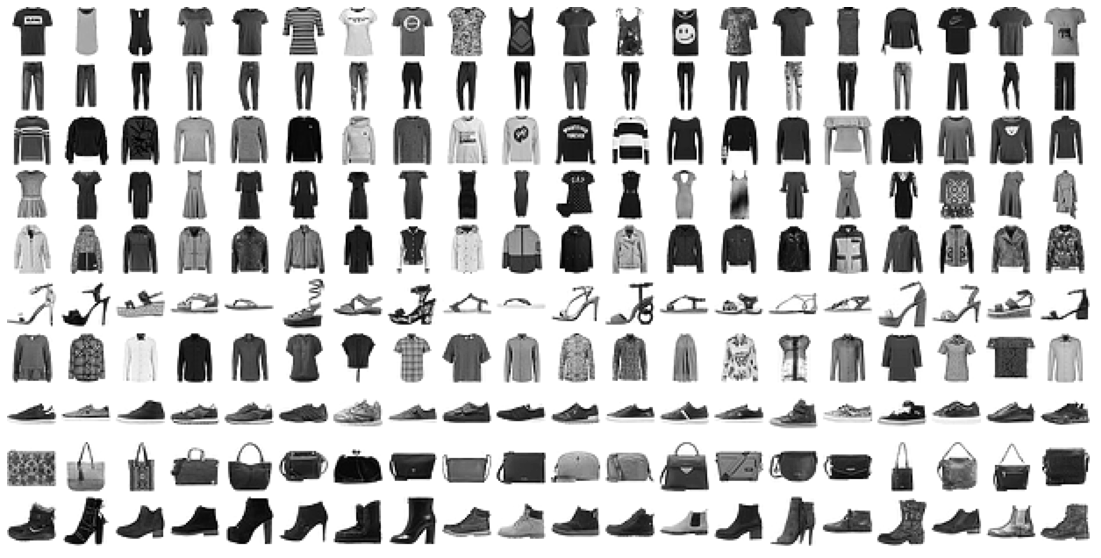

In [6]:
idxList = []
for i in range(10):
    idxTemp = np.argwhere(y1 == i).squeeze()
    idxList.append(idxTemp)


for i in range(10):
    idx = idxList[i]
    for n in range(20):
        if n == 0:
            Img = np.hstack((255 - X1[idx[n]], np.ones((28, 3)) * 255))
        else:
            Img = np.hstack((Img, 255 - X1[idx[n]], np.ones((28, 3)) * 255))

    if i == 0:
        ImgT = np.vstack((Img, np.ones((3, Img.shape[1])) * 255))
    else:
        ImgT = np.vstack((ImgT, Img, np.ones((3, Img.shape[1])) * 255))

plt.figure(figsize=(20, 10))
plt.imshow(ImgT, cmap="gray")
plt.axis("off")


## Shuffle training set and sort test set

In [17]:
idx = rd.permutation(X1.shape[0])
X1 = X1[idx]
y1 = y1[idx]


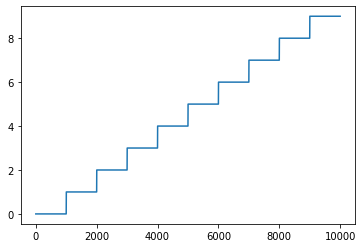

In [18]:
idx = np.argsort(y2)
y2 = y2[idx]
X2 = X2[idx]
plt.plot(y2)


## Images must be in vector format (make sure that data is in "float" format)

In [9]:
X1 = X1.reshape((60000, 28**2)) * 1.0
X2 = X2.reshape((X2.shape[0], 28**2)) * 1.0
print("Training set:", X1.shape, X1.dtype)
print("Test set:    ", X2.shape, X2.dtype)


Training set: (60000, 784) float64
Test set:     (10000, 784) float64


## Train, predict and check confusion matrix - use SGDClassifier (try others)

In [19]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier().fit(X1, y1)
y2e = sgd.predict(X2)


In [20]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y2, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2 != y2e), X2.shape[0]))


[[724   5  40 109   3   0 106   0  12   1]
 [  3 915  10  62   1   0   4   1   3   1]
 [  9   1 783  25  17   0 161   0   4   0]
 [ 13   6  13 921   5   0  37   1   4   0]
 [  0   0 247  97 165   0 490   0   1   0]
 [  1   1   0   5   1 839   5  89  23  36]
 [104   2 130 102  14   0 629   0  19   0]
 [  0   0   0   0   0   8   0 977   1  14]
 [  0   2   8  12   0   4  53   6 915   0]
 [  0   0   2   1   0  10   7  79   0 901]]
Total number of erros 2231 (in 10000)


## Since test set is ordered, one can also check erros visually

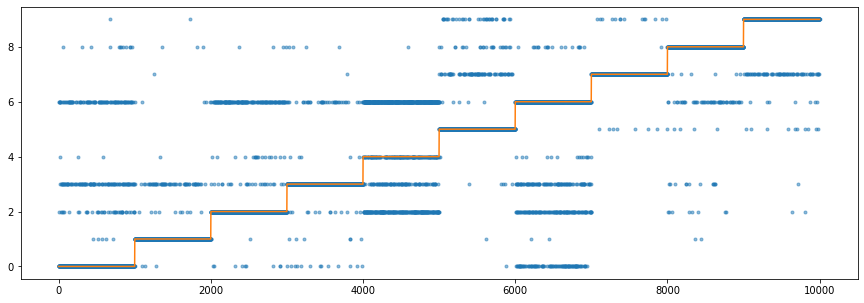

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(y2e, ".", alpha=0.5)
plt.plot(y2)


## Possible problem: different means and variances of each of the 784 data dimensions

Text(0.5, 1.0, 'Standard Deviations')

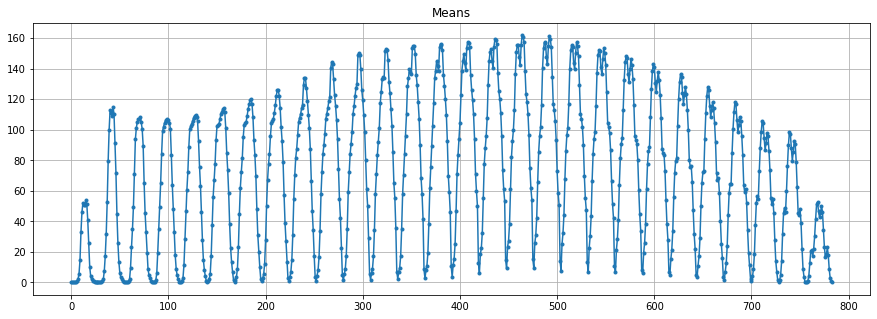

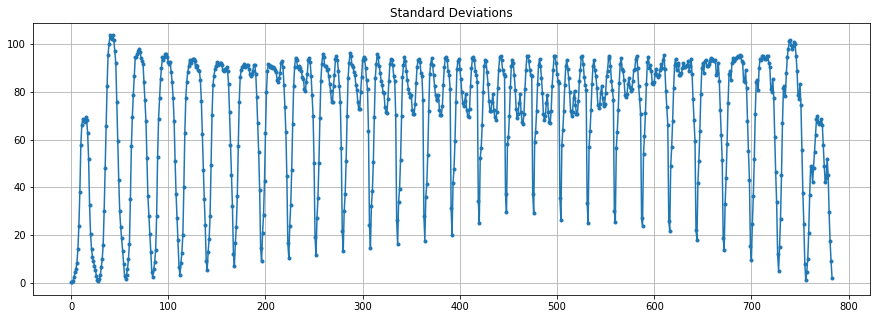

In [124]:
m = np.mean(X1, axis=0)
plt.figure(figsize=(15, 5))
plt.plot(m, ".-")
plt.grid(True)
plt.title("Means")

s = np.std(X1, axis=0)
plt.figure(figsize=(15, 5))
plt.plot(s, ".-")
plt.grid(True)
plt.title("Standard Deviations")


## Pre-process data (0 mean and unit variance in each dimension)

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X1)
X1s = sc.transform(X1)
X2s = sc.transform(X2)


In [28]:
sgd = SGDClassifier().fit(X1s, y1)
y2e = sgd.predict(X2s)
print(confusion_matrix(y2, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2 != y2e), X2.shape[0]))


[[756   4  13  70   6   0 132   0  19   0]
 [  1 944   5  35   5   0   9   0   1   0]
 [  9   1 713  17 121   0 127   0  12   0]
 [ 30  11  15 860  34   0  47   0   3   0]
 [  1   0 125  50 712   0 111   0   1   0]
 [  1   0   0   0   0 910   2  45  12  30]
 [131   2 112  70  87   0 559   0  39   0]
 [  0   0   0   0   0  34   0 925   2  39]
 [  6   1   2  15   2   1  33   5 935   0]
 [  0   0   1   1   0  14   1  36   1 946]]
Total number of erros 1740 (in 10000)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Pre-process data with PCA - use different values for total variance
## Repeat the process with the normalized data (StandarScaler) to check if it is better

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, whiten=True).fit(X1)
X1p = pca.transform(X1)
X2p = pca.transform(X2)
print("Nº of Principal Components kept: %d" % X1p.shape[1])


Nº of Principal Components kept: 84


In [37]:
sgd = SGDClassifier().fit(X1p, y1)
y2e = sgd.predict(X2p)
print(confusion_matrix(y2, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2 != y2e), X2.shape[0]))


[[790   3  19  74  13   1  81   0  19   0]
 [  4 944  10  31   6   0   2   1   2   0]
 [ 39   1 738  13 122   0  76   0  11   0]
 [ 35  13  14 873  29   0  31   0   5   0]
 [  2   1 123  58 709   0  99   0   8   0]
 [  3   0   1   3   0 903   2  50  14  24]
 [159   1 131  71 113   0 491   0  34   0]
 [  2   0   0   0   0  35   0 928   0  35]
 [  8   1   8  17   3   7  16   6 934   0]
 [  1   0   2   0   0  12   3  37   1 944]]
Total number of erros 1746 (in 10000)


# Binary classification problem (positives are class 3 - dresses)

### Change labels

In [38]:
y1b = (y1 == 3) * 1
y2b = (y2 == 3) * 1


### Train and test

In [61]:
sgd = SGDClassifier().fit(X1p, y1b)
y2e = sgd.predict(X2p)
print(confusion_matrix(y2b, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2b != y2e), y2b.shape[0]))


[[8867  133]
 [ 247  753]]
Total number of erros 380 (in 10000)


In [62]:
r1 = np.sum(y2e[y2b == 1] == 1) / (
    np.sum(y2e[y2b == 1] == 1) + np.sum(y2e[y2b == 1] == 0)
)  # recall
p1 = np.sum(y2e[y2b == 1] == 1) / (
    np.sum(y2e[y2b == 1] == 1) + np.sum(y2e[y2b == 0] == 1)
)  # precision
f1 = np.sum(y2e[y2b == 0] == 1) / (
    np.sum(y2e[y2b == 0] == 0) + np.sum(y2e[y2b == 0] == 1)
)  # fp-rate
print("Recall: %3f - Precision: %3f - FP-rate: %3f" % (r1, p1, f1))


Recall: 0.753000 - Precision: 0.849887 - FP-rate: 0.014778


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y2b, y2e))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9000
           1       0.85      0.75      0.80      1000

    accuracy                           0.96     10000
   macro avg       0.91      0.87      0.89     10000
weighted avg       0.96      0.96      0.96     10000



# Model Calibration (changing decision threshold)

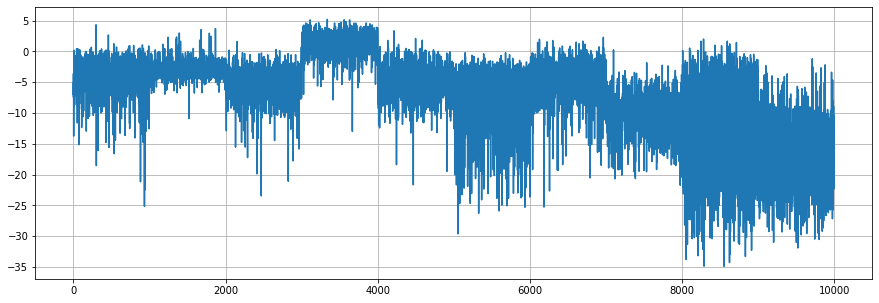

In [64]:
r2e = sgd.decision_function(X2p)
plt.figure(figsize=(15, 5))
plt.plot(r2e)
plt.grid(True)


In [66]:
print(confusion_matrix(y2b, (r2e >= 0) * 1))  # default threshold
print(
    "Total number of erros %d (in %d)" % (np.sum(y2b != (r2e >= 0) * 1), y2b.shape[0])
)


[[8867  133]
 [ 247  753]]
Total number of erros 380 (in 10000)


## Change threshold - reduce the false negatives

In [70]:
lim2 = -0.191
y2eB = (r2e > lim2) * 1
print(confusion_matrix(y2b, y2eB))
print("Total number of erros %d (in %d)" % (np.sum(y2b != y2eB), y2b.shape[0]))


[[8842  158]
 [ 215  785]]
Total number of erros 373 (in 10000)


In [71]:
r2 = np.sum(y2eB[y2b == 1] == 1) / (
    np.sum(y2eB[y2b == 1] == 1) + np.sum(y2eB[y2b == 1] == 0)
)
p2 = np.sum(y2eB[y2b == 1] == 1) / (
    np.sum(y2eB[y2b == 1] == 1) + np.sum(y2eB[y2b == 0] == 1)
)
f2 = np.sum(y2eB[y2b == 0] == 1) / (
    np.sum(y2eB[y2b == 0] == 0) + np.sum(y2eB[y2b == 0] == 1)
)
print("Recall: %3f - Precision: %3f - FP-rate: %3f" % (r2, p2, f2))


Recall: 0.785000 - Precision: 0.832450 - FP-rate: 0.017556


In [72]:
lim3 = -1.75
y2eC = (r2e > lim3) * 1
print(confusion_matrix(y2b, y2eC))
print("Total number of erros %d (in %d)" % (np.sum(y2b != y2eC), y2.shape[0]))
r3 = np.sum(y2eC[y2b == 1] == 1) / (
    np.sum(y2eC[y2b == 1] == 1) + np.sum(y2eC[y2b == 1] == 0)
)
p3 = np.sum(y2eC[y2b == 1] == 1) / (
    np.sum(y2eC[y2b == 1] == 1) + np.sum(y2eC[y2b == 0] == 1)
)
f3 = np.sum(y2eC[y2b == 0] == 1) / (
    np.sum(y2eC[y2b == 0] == 0) + np.sum(y2eC[y2b == 0] == 1)
)
print("Recall: %3f - Precision: %3f - FP-rate: %3f" % (r3, p3, f3))


[[8220  780]
 [  58  942]]
Total number of erros 838 (in 10000)
Recall: 0.942000 - Precision: 0.547038 - FP-rate: 0.086667


# ROC curve + Precision-recall curve - 3 thresholds

In [54]:
import sklearn.metrics as skm


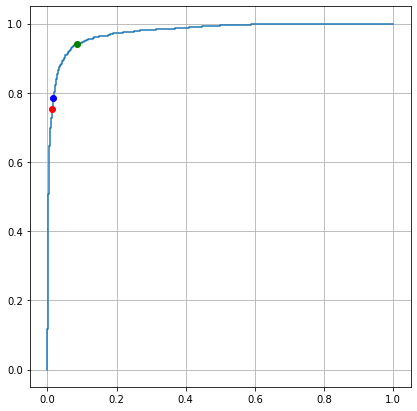

In [73]:
fp, tp, t = skm.roc_curve(y2b, r2e)

plt.figure(figsize=(7, 7))
plt.plot(fp, tp)
plt.plot(f1, r1, "or")
plt.plot(f2, r2, "ob")
plt.plot(f3, r3, "og")

plt.axis("scaled")
plt.grid(True)


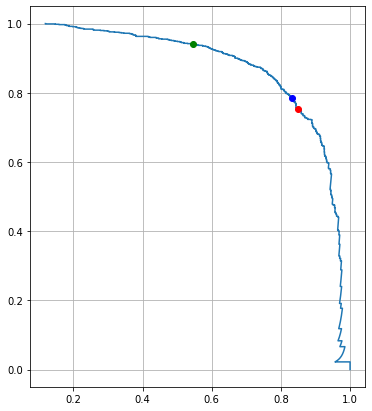

In [74]:
pre, rec, lim = skm.precision_recall_curve(y2b, r2e)
plt.figure(figsize=(7, 7))
plt.plot(pre, rec)
plt.plot(p1, r1, "or")
plt.plot(p2, r2, "ob")
plt.plot(p3, r3, "og")

plt.axis("scaled")
plt.grid(True)


## Precion, Recall and F-score  for the thresholds used

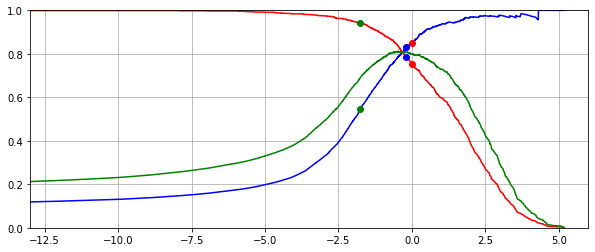

In [80]:
plt.figure(figsize=(10, 4))
plt.plot(lim, pre[:-1], "b")
plt.plot(lim, rec[:-1], "r")
fsc = 2 * pre * rec / (pre + rec)
plt.plot(lim, fsc[:-1], "g")

plt.plot(0, p1, "or")
plt.plot(0, r1, "or")
plt.plot(lim2, p2, "ob")
plt.plot(lim2, r2, "ob")
plt.plot(lim3, p3, "og")
plt.plot(lim3, r3, "og")

plt.axis([np.floor(lim.min()), np.ceil(lim.max()), 0, 1])
plt.grid(True)


In [79]:
np.floor(lim.min())


-13.0

## Model Comparison (try another classifier)

In [85]:
from sklearn.ensemble import RandomForestClassifier

RandF = RandomForestClassifier().fit(X1p, y1b)
y2f = RandF.predict(X2p)
print(confusion_matrix(y2b, y2f))
print("Total number of erros %d (in %d)" % (np.sum(y2b != y2f), y2b.shape[0]))


[[8945   55]
 [ 232  768]]
Total number of erros 287 (in 10000)


In [122]:
r2f = RandF.predict_proba(X2p)[:, 1]
yB = (r2f > 0.5) * 1  # default threshold
print(confusion_matrix(y2b, yB))
print("Total number of erros %d (in %d)" % (np.sum(y2b != yB), y2b.shape[0]))


[[8945   55]
 [ 232  768]]
Total number of erros 287 (in 10000)


Recall: 0.785000 - Precision: 0.832450 - FP-rate: 0.017556


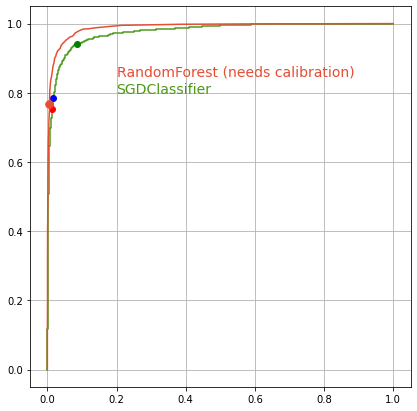

In [123]:
fp, tp, t = skm.roc_curve(y2b, r2e)

plt.figure(figsize=(7, 7))
plt.plot(fp, tp, color=[0.3, 0.6, 0.1])
plt.text(0.2, 0.8, "SGDClassifier", fontsize=14, color=[0.3, 0.6, 0.1])

plt.plot(f1, r1, "or")
plt.plot(f2, r2, "ob")
plt.plot(f3, r3, "og")

fp2, tp2, t2 = skm.roc_curve(y2b, r2f)
r4 = np.sum(yB[y2b == 1] == 1) / (np.sum(yB[y2b == 1] == 1) + np.sum(yB[y2b == 1] == 0))
p4 = np.sum(yB[y2b == 1] == 1) / (np.sum(yB[y2b == 1] == 1) + np.sum(yB[y2b == 0] == 1))
f4 = np.sum(yB[y2b == 0] == 1) / (np.sum(yB[y2b == 0] == 0) + np.sum(yB[y2b == 0] == 1))
print("Recall: %3f - Precision: %3f - FP-rate: %3f" % (r2, p2, f2))
plt.plot(fp2, tp2, color=[0.9, 0.3, 0.2])
plt.text(
    0.2, 0.85, "RandomForest (needs calibration)", fontsize=14, color=[0.9, 0.3, 0.2]
)

plt.plot(f4, r4, ".", ms=15, color=[0.9, 0.3, 0.2])
plt.axis("scaled")
plt.grid(True)
